# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [23, 254, 367]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  26373  36423    22019    5154              4337         16523
1  10379  17972     4748    4686              1547          3265
2   3477    894      534    1457               252           342

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** 

1. Customer #23 orders more than twice the average amount of fresh products, nearly three times the average amount of grocery items, nearly four times the average amount of milk products, and around ten times the amount of delicatessen items ordered by the typical customer. My guess is that this establishment is a supermarket that has everything in much larger quantities than any local market or cafe.

2. Compared to customer #23, customer #254 orders in quantities much closer to the average wholesale purchaser. Customer #254 orders fewer fresh products, grocery items, and detergents & paper products compared to the average wholesale purchaser, but orders more milk products (nearly three times) and delicatessen items (around twice as much). Based on these quanties, my guess is that this wholesale purchaser is some sort of cafe, possibly an ice-cream parlor.

3. Customer #367 orders in quantities much smaller than the average wholesale consumer for all categories. My guess is that this wholesale purchaser is a small corner market that carries everything, but in much smaller quantities compared to the supermarkets.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# Import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(columns = ['Milk'])
print(new_data.head())

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(data, new_data, test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("The R^2 value is " + str(score))

   Fresh  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669     7561     214              2674          1338
1   7057     9568    1762              3293          1776
2   6353     7684    2405              3516          7844
3  13265     4221    6404               507          1788
4  22615     7198    3915              1777          5185
The R^2 value is 0.7682523765654939


C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

With the Decision Trees Regressor, I attempted to predict the amount spent on milk products using the other features. The model returned a R^2 value of 0.77, suggesting that the amount of fresh produce can be relatively well predicted using the other data. This means that it is probably not an important feature for identifying customer spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\Tim\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


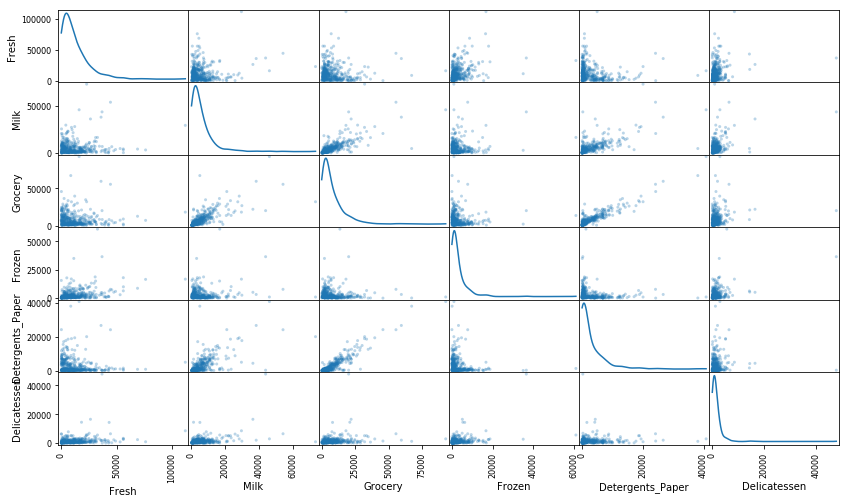

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

In [7]:
# View correlation matrix
print(data.corr())

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


**Answer:**

1. For all of the features, the data are heavily skewed to the left, meaning that most of the customers make small purchases for each of the categories, though there exist a few large purchasers for each of the categories as well (likely supermarkets, such as customer #23 from Question 1). 
2. From looking at the scatter matrix (and the following correlation table I generated), it appears that spending on grocery items is tightly correlated to spending on detergents and paper items (R^2 = .92). To a slightly lesser degree, both are correlated with spending on milk products, with an R^2 value of .728 between spending on grocerty items and spending on milk products. 
3. The fact that spending on milk products correlates pretty well with spending on grocery items and on detergents and paper confirms my initial thoughts on the relevance of milk product spending to predict overall consuper spending behavior. Since we can predict the spending on milk from the spending of other categories, it is a less relevant feature compared to others. 
4. Amount spent on milk products, like the rest of the data, is heavily skewed to the left. The median amount is 3,267; however, outliers with large purchases move the average amount spent on milk products to 5,796 (significantly higher).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\Tim\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


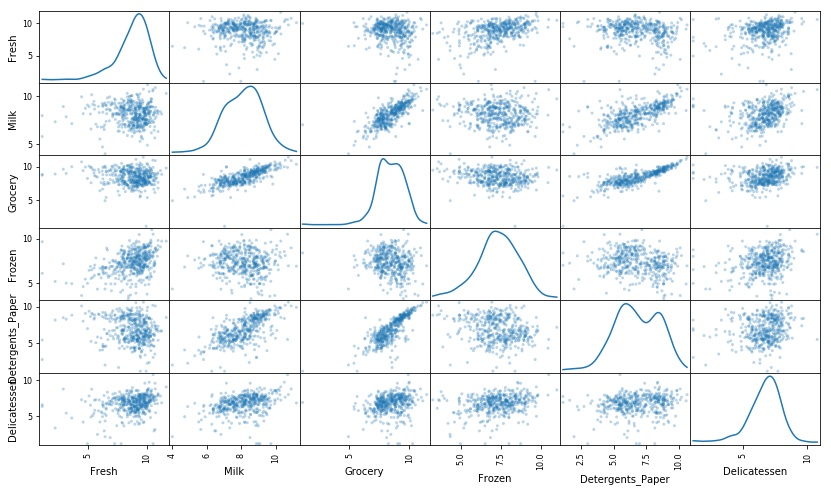

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.180096  10.502956  9.999661  8.547528          8.374938      9.712509
1   9.247540   9.796570  8.465479  8.452335          7.344073      8.091015
2   8.153925   6.795706  6.280396  7.284135          5.529429      5.834811

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
display(log_data.describe())

Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     8.730544    8.121047    8.441169    7.301396          6.785972   
std      1.480071    1.081365    1.116172    1.284540          1.721020   
min      1.098612    4.007333    1.098612    3.218876          1.098612   
25%      8.048059    7.334981    7.674616    6.609678          5.548101   
50%      9.048286    8.196159    8.467057    7.330388          6.705018   
75%      9.737064    8.880480    9.273854    8.175896          8.274341   
max     11.627601   11.205013   11.437986   11.016479         10.617099   

       Delicatessen  
count    440.000000  
mean       6.665133  
std        1.310832  
min        1.098612  
25%        6.011875  
50%        6.872645  
75%        7.506728  
max       10.777768

In [11]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    #print(str(feature) + ' ' + str(Q1))
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    #print(str(feature) + ' Normal Range:' + str(Q1 - step) + ' - ' + str(Q3 + step))
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    print("Normal range for feature '{}': {} - {}".format(feature, Q1 - step, Q3 + step))
    print(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [66, 95, 218, 338]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Normal range for feature 'Fresh': 5.514550833608026 - 12.270571816559475
        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.49306

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

1. Customers #65, #66, #75, and #154 were outliers in more than one category. As expected from my answer about the correlation between grocerty, milk products, and Detergent & Paper, customers #75 and #154 were outside the expected normal range in the categories of Grocery / Detergent & Paper and Grocery / Milk / Delicatessen respectively. Based on the fact that it was below these amounts all fell below the expected range, I would guess that these two outliers represent a tiny corner markets or cafes that would carry small amounts of all these categories. Customer #65 is an outlier in both the categories of Fresh / Frozen, and since the amounts are also small, I would guess that this must be some sort of small market. Customer #66 is an outlier in the categories of Delicatessen and Fresh. 

2. I do not think that these points should be removed, since (with the exeption of customer #66) they tend to be outliers in categories that are normally distributed. 

3. I removed four data points (Customers #66, #95, #218, #338) that were outliers with regard purchases in the 'Fresh' category. I made decision because that category remains the most skewed, after the logarithmic transformation, due to these outliers. Because the k-means algorithm updates the cluster by taking the average value of the data points, it will be sensitive to the presence of outliers, and some amount of data pruning in necessary before any clustering.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

1. The first and second component explain nearly 73 percent (.4618 + .2681 = .7299) of the total variance in the data.

2. The first four components explain nearly 93 percent (.4618 + .2681 + .1060 + .0934 = .9293) of the total variance in the data.

3. The first principal component (PC) alone explains nearly half the variance in the data (.4618). This first PC is most influenced by the features Detergents & Paper, Milk, and Grocerty items. Therefore, changes in those features will heavily influence the value of the first PC. The second PC, which explains an additional 26.8 percent of the variance in the data, is mostly influenced by the features: delicatessen, frozen, and fresh items. Changes in these three feature values will most heavily influence the second PC (though to a lesser degree they will also influence the first PC as well). The third PC explains only an additional 10 percent of the variance in the data, so it is adding considerably less value compared to the first two components. The third PC is mostly influenced by the delicatessen items feature, and (to a lesser degree) fresh items, frozen items, and detergents & paper. The fourth PC explains an adittional nine percent of the variation (comparable to the third PC) and is influenced by changes in the fresh and frozen features. The fifth PC explains almost five percent of the variation and is mostly influenced by changes in milk, grocery, and detergents & paper products. Finally, the sixth dimension explains less than three percent of the variation and is influenced by changes in milk, grocery, and detergents & paper products. 


* The first four dimensions, which explain nearly 93 percent of the variance in customer spending, are influenced by changes in all the features. However, by not including the fifth and sixth PC, the first four dimensions will miss some of the variance captured by changes in milk, grocery, and detergents & paper. These three items have the largest values for the feature weights in the fifth and sixth PCs. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.8800      -3.7040      -0.8597      -0.0101       0.7271   
1      -1.0454      -1.9595      -0.4092      -0.5906       0.6190   
2       2.4780       1.2341      -0.1471      -0.4235      -0.7956   

   Dimension 6  
0       0.2194  
1       0.8995  
2       0.7863

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.8800      -3.7040
1      -1.0454      -1.9595
2       2.4780       1.2341

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

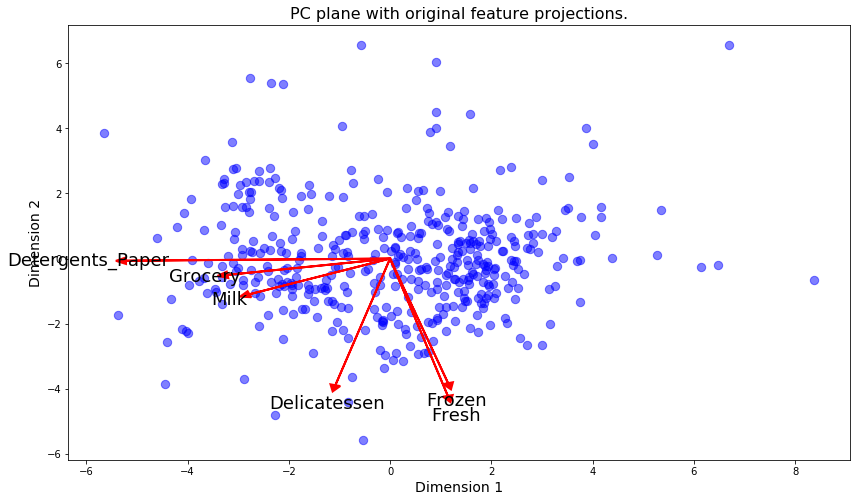

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

* Detergents & Paper, and to a lesser degree grocery and milk products are the features most strongly correlated with the first component. The second PC looks to be a mix of delicatessen, frozen, and fresh item features. Yes, this matches with my observations from the pca_results plot I obtained earlier

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* The K-Means clustering algorithm is extremely fast and is easy to interpret. It is a 'hard clustering' algorithm, meaning we are sure that each record belongs to a specific group, and we only revise that belief in subsequent assignment iterations. Since each observation belongs to only one cluster, the clusters cannot overlap. 

* With the Gaussian Mixture Model clustering algorithm, we more explicitly incorporate our uncertainty about the cluster assignments, which is why it is called 'soft clustering.' Because of this uncertainty, clusters can overlap.

* Given the strengths and weaknesses of each method, I plan on using the K-Means clustering algorithm. I think that since each customer will fit into a certain type of establishment (eg. restaurant, supermarket, deli, ice cream parlor, etc.), the hard clustering method employed by K-Means will be best suited for this data set. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data
# Given my uncertainty, I am going to start with 4 clusters (deli, small market, supermarket, restaurant) 
# and then then evaluate the silhouette coefficient
clusterer = KMeans(n_clusters=2, random_state=1)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

# Following example here: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
# to perform slihouette analysis on several cluster counts

# I am going to run it on cluster sizes from 2 to 8
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# For each cluster size, fit the clusterer on the data and cal
for n_clusters in range_n_clusters:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=10)
    preds2 = clusterer2.fit_predict(reduced_data)
    silhouette_avg = silhouette_score(reduced_data, preds2)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.4229143173886389
For n_clusters = 3 The average silhouette_score is : 0.39159363792065627
For n_clusters = 4 The average silhouette_score is : 0.330687981982041
For n_clusters = 5 The average silhouette_score is : 0.35284719591300856
For n_clusters = 6 The average silhouette_score is : 0.3542172852528206
For n_clusters = 7 The average silhouette_score is : 0.36454076872279917
For n_clusters = 8 The average silhouette_score is : 0.3604979509154894


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

From the sklearn website: "Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster."

As shown above, I ran the clusterer on different cluster sizes, ranging from 2 to 8. The cluster count resulting in the best silhouette score (closest to 1 based on the definition above) was 2, which resulted in an average silhouette_score of .4229.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [24]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9143.0  1900.0   2331.0  2048.0             290.0         673.0
Segment 1  4088.0  7870.0  12497.0   930.0            4597.0         992.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Considering the total purchase cost of each product category for the centers of the two clusters, my guess is that the establishments in this dataset can generally be grouped into two types: restaurants (Segment 0 above) and markets / grocery stores (Segment 1 above). 

The restaurants will primarily be purchasing fresh and frozen products to be cooked for their patrons. The average customer in Segment 0 purchases above the median amount of fresh and milk products from the entire dataset, and amounts of detergents & paper and grocery items far below both the mean and median customer in the data set.

The markets / grocerty stores, in contrast, will have much more variety in what it purchases, including items such as detergents & paper and grocery items. Customers in Segment 1 purchased those items in quantities significantly above the mean for the entire data set. For the rest of the items, customers in Segment 1 purchased items in quantities around the mean / median values of the entire data set.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Going back to my samples from Question 1:

* My guess was that Customer #23 (Sample point 0) was going to be a supermarket, since that customer ordered large quantities of all types of products. Here, the K-Means clustering algorithm predicted that it would be in Customer Segment 1, which I decided included markets / grocery stores. The K-Means clustering results support my original hyptothesis. 
* My guess for Customer #254 (Sample point 1) was that it was a small ice-cream parlor, due to the high volume of frozen products. This clusterer predicted that it is also a market of some sort; looking back at the categories, I think this makes more sense now, especially after seeing the results of the PCA, which really showed that the biggest difference between the two categories is in the amount of detergents & paper products, as well as grocery items. Looking at the data now, Sample point 1 is really much closer in nature to Sample point 0, just with smaller amounts of everything.
* My original guess for Customer #367 was that it was a small market; however, the clusterer put it in the category with what I guess to be the restaurants. As with looking back at Customer #254, the clusterer's determination makes sense, since it has far lower relative purchase sizes of grocery and detergents & paper products compared to the other two.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

I don't think we can assume the changes will affect all customers equally. The wholesale distributor is considering reducing the frequency of delivery service from 5 days of week to 3 days a week. I see this as most problematic for the delivery of fresh products, which have the shortest shelf life among the different product categories.

Segment 0, which I believe to represent restaurants, would be most affected by this change since it relies so heavily on fresh products. Reducing the delivery from 5 days of week to 3 days a week would potentially hurt their business that relies on regular delivery of fresh food.

Given that we would be most worried about customers from Segment 0, that is where I would start the A/B testing, or even just polling the customers.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We could build supervised learner that was trained on the original customers, with the target variable being the customer segment classification we assigned to each of the clusters. 

However, even without the supervised learner, we could just build a model to transform the data and run it through the k-means prediction function as we did before with the sampled customers to see which cluster they would belong to. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [27]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* Our clustering algorithm did pretty well picking up this difference in customer types! Once we add the type label in the plot above, it is pretty clear that there are perceptible differences between those two groups, and it doesn't look like that many of the points would have been misclassified by our k-means clusterer. I am especially impressed how, using the silhouette analysis, we came to the determination that the data points were best divided into two clusters, which matches the fact that we are now mapping two categories here. 

* Most of the difference between the two categories, as shown by our clusterer as well as the labels here, really arises from the differences in Dimension 1. I could draw a vertical line around -0.5 for Dimension 1, and that would be a pretty good approximation for the line created by the clusterer. However, even with this line, there are still retailers and hotels/cafes/restaurants that cross this line, so I would say that the segments are not completely pure. This also makes me rethink my evaluatio of K-Means; maybe it would have been better to go with the gaussian mixture model. 

* I would consider these classifications pretty close to what I had picked before. I suspected that Segment 0 represented restaurants. The added classification revealed my guess to be pretty close with the label Restaurant/Hotel/Cafe, just a more broad version of my original guess. I had suspected that Segment 1 would represent grocery stores, and the label here is 'Retailer,' again a broader version of my pick of Grocery Store. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.